<a href="https://colab.research.google.com/github/NicholasSk/FP_EDP/blob/with-P/edp_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def readMeas(file_name):
  with open('drive/My Drive/Skoltech/1_Term/EDP/FP/' + file_name) as file:
    list_D = []
    list_beta = []
    list_eps = []
    for line in file:
      l = line.split()
      list_D.append(float(l[0]))
      list_beta.append(float(l[1]))
      list_eps.append(float(l[2]))
    return list_D, list_beta, list_eps


In [4]:
D_A,beta_A,eps_A = readMeas('z1.txt')
D_B,beta_B,eps_B = readMeas('z2.txt')

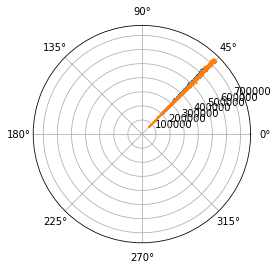

In [5]:
plt.polar(beta_A,D_A)
plt.polar(beta_B,D_B)

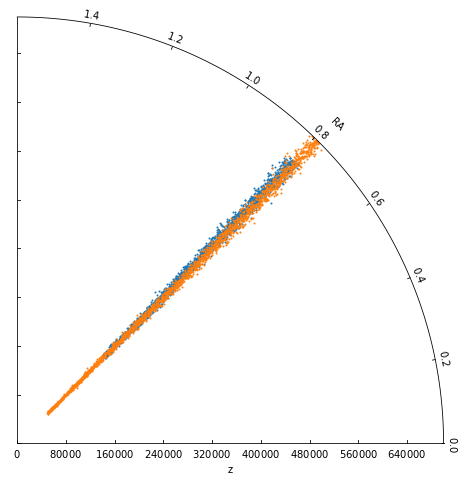

In [6]:
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
from matplotlib.projections import PolarAxes
import matplotlib.pyplot as plt

def setup_axes3(fig, rect):
    tr = PolarAxes.PolarTransform() 

    ra0, ra1 = 0, np.pi/2. #max and min RA vals
    cz0, cz1 = 0, 700000         #max and min z vals
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, cz0, cz1))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # adjust axis
    ax1.axis["left"].set_axis_direction("bottom")
    ax1.axis["right"].set_axis_direction("top")
    ax1.axis["bottom"].set_visible(False)
    ax1.axis["top"].set_axis_direction("bottom")
    ax1.axis["top"].toggle(ticklabels=True, label=True)
    ax1.axis["top"].major_ticklabels.set_axis_direction("top")
    ax1.axis["top"].label.set_axis_direction("top")
    ax1.axis["left"].label.set_text(r"z")
    ax1.axis["top"].label.set_text(r"RA")

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  
    ax1.patch.zorder = 0.9  

    return ax1, aux_ax

fig = plt.figure(figsize=(8,8))

ax3, aux_ax3 = setup_axes3(fig, 111)

D_A_Oxy = np.array(D_A)*np.cos(np.array(eps_A))
D_B_Oxy = np.array(D_B)*np.cos(np.array(eps_B))


aux_ax3.scatter(beta_A, D_A_Oxy,s = 1)
aux_ax3.scatter(beta_B, D_B_Oxy,s = 1)


plt.show()

In [7]:
def showPlease(arr,legend = [],xlabel ="x",ylabel="y",title="title"):
  params = {'legend.fontsize': 20,
  'legend.handlelength': 2}
  plt.rcParams.update(params)
  fig, ax = plt.subplots()
  max_len = 0
  for i in arr:
    if(len(i) > max_len):
      max_len = len(i)
  for i in arr:
    if(len(i) == max_len):
      plt.plot(i)
    else:
      plt.plot([j for j in range(max_len - len(i),max_len)],i)
  fig.set_figwidth(15)
  fig.set_figheight(7)
  plt.grid()
  plt.xlabel(xlabel, fontsize = 16)
  plt.ylabel(ylabel, fontsize = 16)
  plt.legend(legend)
  plt.title(title, fontsize = 16);
  plt.show()

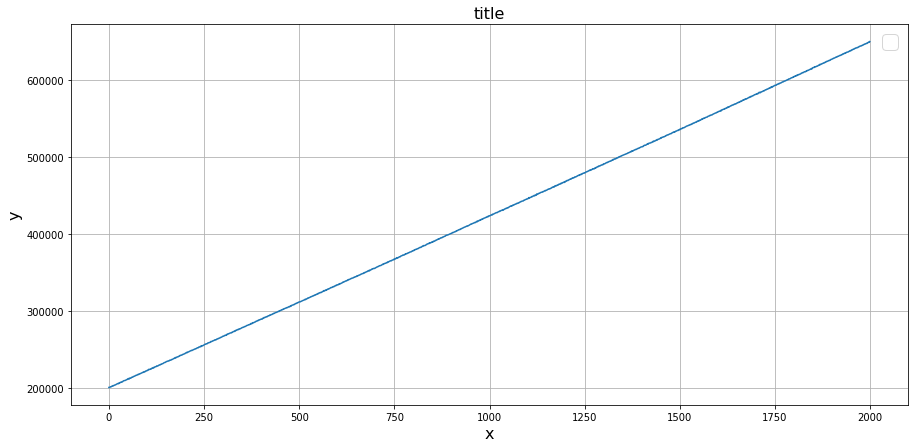

In [8]:
showPlease([D_A])

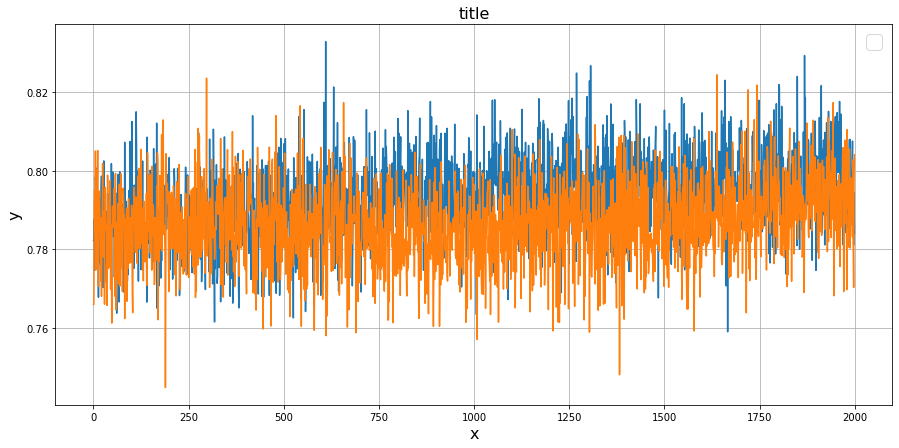

In [9]:
showPlease([beta_A,beta_B])

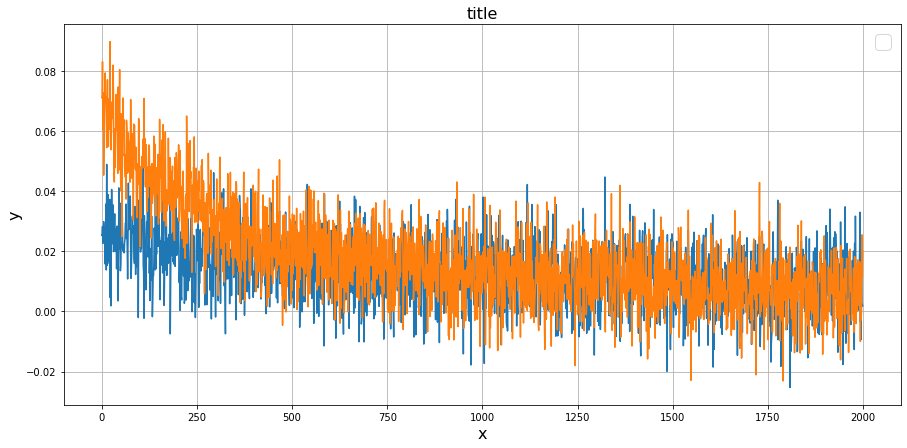

In [10]:
showPlease([eps_A,eps_B])

In [28]:
def vector(x):
 v = []
 for i in x:
  v.append([i])

 return np.matrix(v)

def giveVectors(l):
  vectors = []
  for i in range(0,len(l[0])):
    v = []
    for j in l:
      v.append(j[i])
    vectors.append(vector(v))
  return vectors

def giveElements(vectors,index):
 x = []
 for i in range(0,len(vectors)):
  x.append((vectors[i][index].item(0)))
 return x

def giveElementsFromMatrix(matrices,index1,index2):
  res = []
  for i in matrices:
    res.append(i.item(index1,index2))
  return res  

class Data:
  def __init__(self, listInternalNoiseSigmas, measProcess = None,\
               F = None, H = None, G = None,initialVectorXK = None, initialMatrixP = None, \
               listExternalNoiseSigmas = None,typeOfProcess = "usual", optimalK = None, \
               size = 500,T = 2,amount = 500):
    self.F = copy.deepcopy(F)
    self.H = copy.deepcopy(H)
    self.G = copy.deepcopy(G)
    #
    self.measProcess = copy.deepcopy(measProcess)
    self.listInternalNoiseSigmas = copy.deepcopy(listInternalNoiseSigmas)
    self.R = self.calculateR(listExternalNoiseSigmas)
    #
    self.T = T
    self.Q = 0 if typeOfProcess == "det" else self.calculateQ(listInternalNoiseSigmas)
    self.initialVectorXK = initialVectorXK.copy() if initialVectorXK is not None else None
    self.initialMatrixP = copy.deepcopy(initialMatrixP)
    self.listExternalNoiseSigmas = copy.deepcopy(listExternalNoiseSigmas)
    self.optimalK = copy.deepcopy(optimalK)
    self.typeOfProcess = typeOfProcess
    self.amount = amount

    self.size = size

  def calculateR(self,listExternalNoiseSigmas):
    l = len(listExternalNoiseSigmas)
    R = np.identity(l)
    for i in range(0,l):
      R.itemset((i,i),listExternalNoiseSigmas[i]**2)
    return R

  def calculateQ(self,listInternalNoiseSigmas):
    l = len(listInternalNoiseSigmas)
    Q = np.identity(l)
    for i in range(0,l):
      Q.itemset((i,i),listInternalNoiseSigmas[i]**2)
    return self.G*Q*self.G.T

def linearize(vector):
  x = vector.item(0,0)
  y = vector.item(2,0)
  z = vector.item(4,0)
  return np.matrix([
                  [x/(x**2 + y**2 + z**2)**0.5 , 0 , y/(x**2 + y**2 + z**2)**0.5 , 0,z/(x**2 + y**2 + z**2)**0.5 ],
                  [ y/(x**2 + y**2 + z**2), 0,-x/(x**2 + y**2 + z**2), 0,0],
                  [ -x*z/((x**2 + y**2 + z**2)*(x**2+y**2)**0.5) ,0,-y*z/((x**2 + y**2 + z**2)*(x**2+y**2)**0.5), 0, (x**2 + y**2)**0.5/(x**2 + y**2 + z**2)]
                  ])

def h(vector):
    x = vector.item(0,0)
    Vx = vector.item(1,0)
    y = vector.item(2,0)
    Vy = vector.item(3,0)
    z = vector.item(4,0)
    return np.matrix([
                    [(x**2 + y**2 + z**2)**0.5],
                    [np.arctan(x/y)],
                    [np.arcsin(z/(x**2 + y**2 + z**2)**0.5)]
                     ])

class Extended_KalmanFilter:
    def __init__(self,dataForKalman):
        self.dataForKalman = dataForKalman
        self.kalmanVectors = None
        self.listK = None
        self.listP = None
        self.length = len(self.dataForKalman.measProcess)
        
    def calculateKalmanVectors(self):
        self.kalmanVectors = []
        self.kalmanVectorsPr = []
        self.listK = []
        self.listP = []
        self.listPtr = []
        prevX = copy.deepcopy(self.dataForKalman.initialVectorXK)
        prevP = copy.deepcopy(self.dataForKalman.initialMatrixP.copy())
        if(self.dataForKalman.optimalK is not None):
            K = self.dataForKalman.optimalK
            for i in range(2,self.length):
                predictedX,predictedP = self.predict(prevX,prevP)
                dH = linearize(predictedX)
                prevX,prevP = self.filtrate(predictedX,predictedP,K,i,dH)
                self.listP.append(prevP)
                self.kalmanVectors.append(prevX)
        else:
            for i in range(2,self.length):
                predictedX,predictedP = self.predict(prevX,prevP)
                dH = linearize(predictedX)
                K = self.calculateK(predictedP,dH)
                prevX,prevP = self.filtrate(predictedX,predictedP,K,i,dH)
                self.listP.append(prevP)
                self.kalmanVectors.append(prevX)
        #self.calculatePol()
        
    def predict(self,prevX,prevP):
        F = self.dataForKalman.F
        Q = self.dataForKalman.Q
        x = F*prevX
        P = F*prevP*F.T + Q
        self.kalmanVectorsPr.append(x)
        self.listPtr.append(P)
        return x, P
    
    def calculateK(self,predictedP,dH):
        R = self.dataForKalman.R
        K = predictedP*dH.T*(dH*predictedP*dH.T + R)**(-1)
        self.listK.append(K)
        return K
    
    def filtrate(self,predictedX,predictedP,K,measIndex,dH):
        meas = self.dataForKalman.measProcess[measIndex].copy()
        x = predictedX + K*(meas - h(predictedX))
        KH = K*dH
        P = (np.identity(KH.shape[0]) - KH) * predictedP
        return x,P
    
    
    def calculatePol(self):
        self.kalmanVectorsPol = []
        self.kalmanVectorsPolPr = []
        for i in self.kalmanVectors:
            D,ang = polar(i.item(0,0),i.item(2,0))
            self.kalmanVectorsPol.append(vector([D,ang]))
        for i in self.kalmanVectorsPr:
            D,ang = polar(i.item(0,0),i.item(2,0))
            self.kalmanVectorsPolPr.append(vector([D,ang]))
    
    def extrapolate(self,step):
        predictions = []
        F = self.dataForKalman.F
        for i in range(step-1,self.length):
            predictions.append((F**(step - 1))*self.kalmanVectors[i - step + 1])
        return predictions
    
    def errors(self,values,index):
        start = 0
        errors = []
        if(len(values) < self.length):
            start = length - len(values)
        for i in range(start,self.length):
            errors.append(self.dataForKalman.trueVectorsOfProcess[i][index][0] - values[i - start ])
        return errors

In [12]:
z_A = giveVectors([D_A,beta_A,eps_A])
z_B = giveVectors([D_B,beta_B,eps_B])

In [86]:
T = 1
P = np.matrix([
               [10**5,0,0,0,0],
               [0,10**5,0,0,0],
               [0,0,10**5,0,0],
               [0,0,0,10**5,0],
               [0,0,0,0,10**5]
])
Phi = np.matrix([
                 [1,T,0,0,0],
                 [0,1,0,0,0],
                 [0,0,1,T,0],
                 [0,0,0,1,0],
                 [0,0,0,0,1]
])
G = np.matrix([
               [T**2/2,0,0],
               [T,0,0],
               [0,T**2/2,0],
               [0,T,0],
               [0,0,T**2/2]
])
initialX_A = np.matrix([
                      [D_A[1]*np.cos(eps_A[1])*np.sin(beta_A[1])],
                      [D_A[1]*np.cos(eps_A[1])*np.sin(beta_A[1]) - D_A[0]*np.cos(eps_A[0])*np.sin(beta_A[0])],
                      [D_A[1]*np.cos(eps_A[1])*np.cos(beta_A[1])],
                      [D_A[1]*np.cos(eps_A[1])*np.cos(beta_A[1]) - D_A[0]*np.cos(eps_A[0])*np.cos(beta_A[0])],
                      [D_A[1]*np.sin(eps_A[1])]
])
initialX_B = np.matrix([
                      [D_B[1]*np.cos(eps_B[1])*np.sin(beta_B[1])],
                      [D_B[1]*np.cos(eps_B[1])*np.sin(beta_B[1]) - D_B[0]*np.cos(eps_B[0])*np.sin(beta_B[0])],
                      [D_B[1]*np.cos(eps_B[1])*np.cos(beta_B[1])],
                      [D_B[1]*np.cos(eps_B[1])*np.cos(beta_B[1]) - D_B[0]*np.cos(eps_B[0])*np.cos(beta_B[0])],
                      [D_B[1]*np.sin(eps_B[1])]
])

internalSigma_X_A = 0.02
internalSigma_Y_A = 0.02
internalSigma_Z_A = 1
listInternalNoiseSigmas_A = [internalSigma_X_A,internalSigma_Y_A,internalSigma_Z_A]

internalSigma_X_B = 0.01
internalSigma_Y_B = 0.01
internalSigma_Z_B = 1
listInternalNoiseSigmas_B = [internalSigma_X_B,internalSigma_Y_B,internalSigma_Z_B]

externalSigma_D = 200
externalSigma_beta = 0.01
externalSigma_eps = 0.01
listExternalNoiseSigmas = [externalSigma_D,externalSigma_beta,externalSigma_eps]

z_A = z_A[2:]
z_B = z_B[2:]

In [87]:
data_A = Data(listInternalNoiseSigmas=listInternalNoiseSigmas_A,initialVectorXK=initialX_A,F= Phi,G=G,T = T,initialMatrixP=P,measProcess=z_A,\
              listExternalNoiseSigmas=listExternalNoiseSigmas)

In [88]:
kalman_A = Extended_KalmanFilter(data_A)

In [89]:
kalman_A.calculateKalmanVectors()

In [90]:
data_B = Data(listInternalNoiseSigmas=listInternalNoiseSigmas_B,initialVectorXK=initialX_B,F= Phi,G=G,T = T,initialMatrixP=P,measProcess=z_B,\
              listExternalNoiseSigmas=listExternalNoiseSigmas)

In [91]:
kalman_B = Extended_KalmanFilter(data_B)

In [92]:
kalman_B.calculateKalmanVectors()

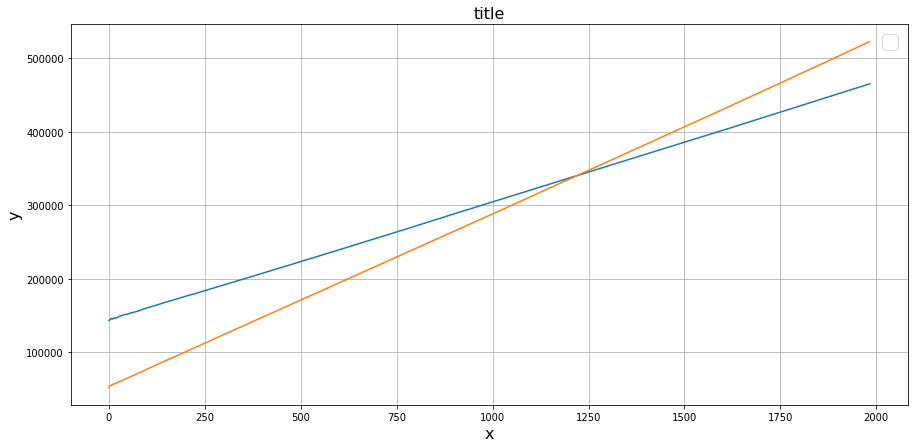

In [93]:
showPlease([giveElements(kalman_A.kalmanVectors,0),giveElements(kalman_B.kalmanVectors,0)])

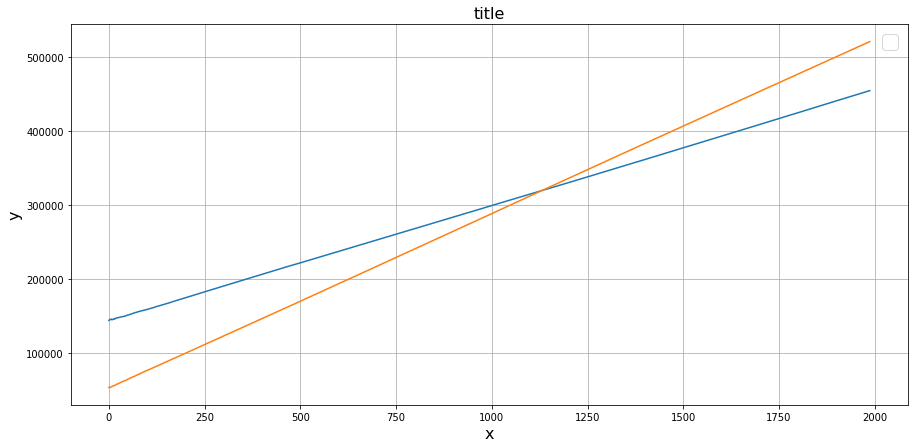

In [57]:
showPlease([giveElements(kalman_A.kalmanVectors,2),giveElements(kalman_B.kalmanVectors,2)])

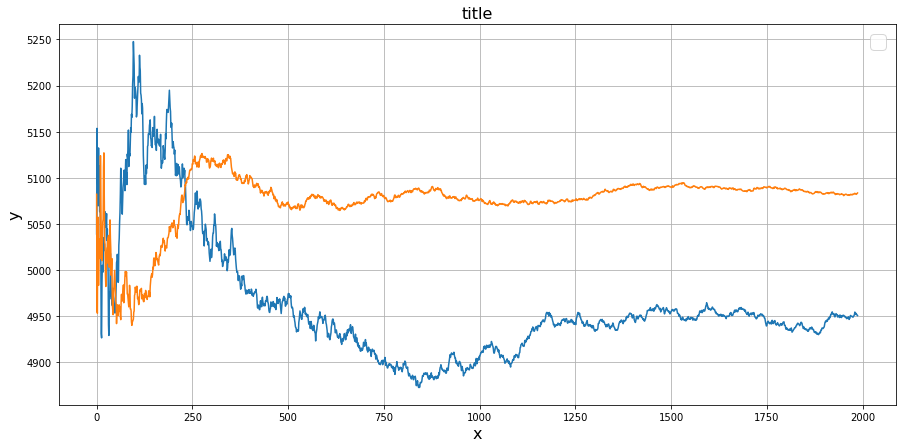

In [58]:
showPlease([giveElements(kalman_A.kalmanVectors,4),giveElements(kalman_B.kalmanVectors,4)])

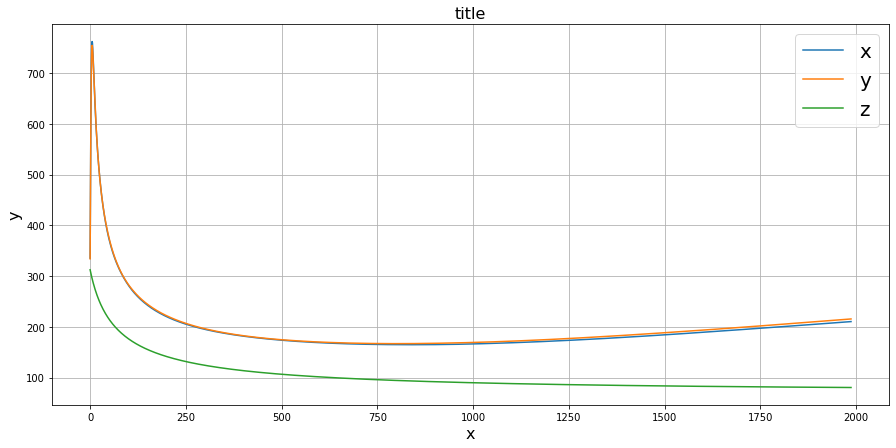

In [59]:
showPlease([np.array(giveElementsFromMatrix(kalman_A.listP,0,0))**0.5,np.array(giveElementsFromMatrix(kalman_A.listP,2,2))**0.5,np.array(giveElementsFromMatrix(kalman_A.listP,4,4))**0.5],["x","y","z"])

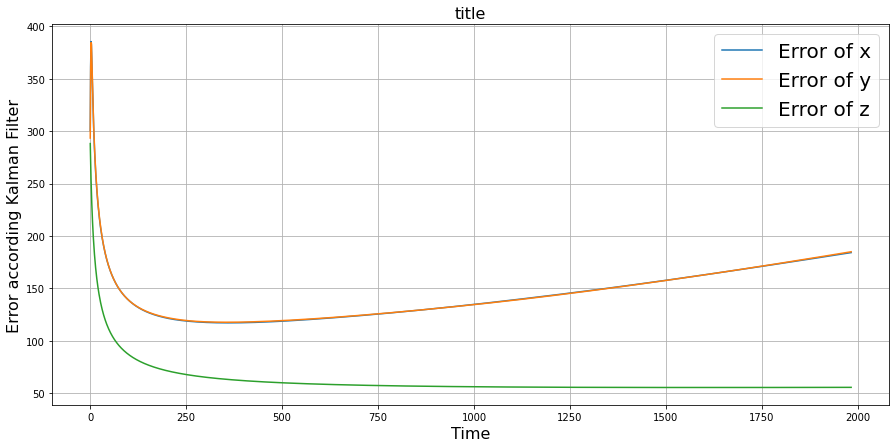

In [96]:
showPlease([np.array(giveElementsFromMatrix(kalman_B.listP,0,0))**0.5,np.array(giveElementsFromMatrix(kalman_B.listP,2,2))**0.5,np.array(giveElementsFromMatrix(kalman_B.listP,4,4))**0.5],["Error of x","Error of y","Error of z"],"Time","Error according Kalman Filter")

In [61]:
optimalK_A = kalman_A.listK[-1]
optimalK_B = kalman_B.listK[-1]
data_A.optimalK = optimalK_A
new_P = np.matrix([
               [10**5,0,0,0,0],
               [0,10**5,0,0,0],
               [0,0,10**5,0,0],
               [0,0,0,10**5,0],
               [0,0,0,0,10**5]
])
data_A.initialMatrixP = new_P
data_B.initialMatrixP = new_P

data_B.optimalK = optimalK_B
kalman_A.calculateKalmanVectors()
kalman_B.calculateKalmanVectors()

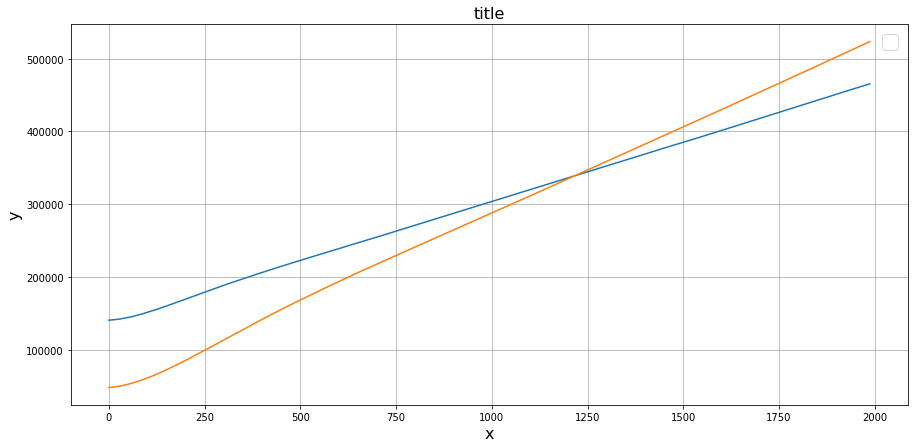

In [62]:
showPlease([giveElements(kalman_A.kalmanVectors,0),giveElements(kalman_B.kalmanVectors,0)])

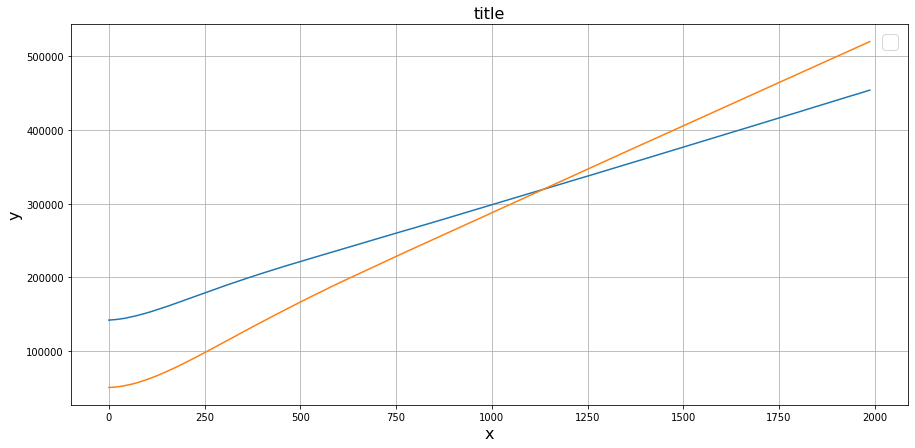

In [63]:
showPlease([giveElements(kalman_A.kalmanVectors,2),giveElements(kalman_B.kalmanVectors,2)])

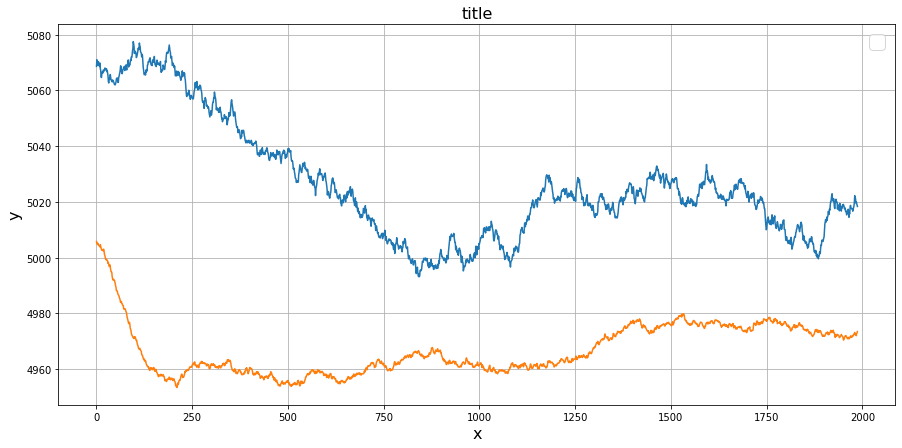

In [64]:
showPlease([giveElements(kalman_A.kalmanVectors,4),giveElements(kalman_B.kalmanVectors,4)])

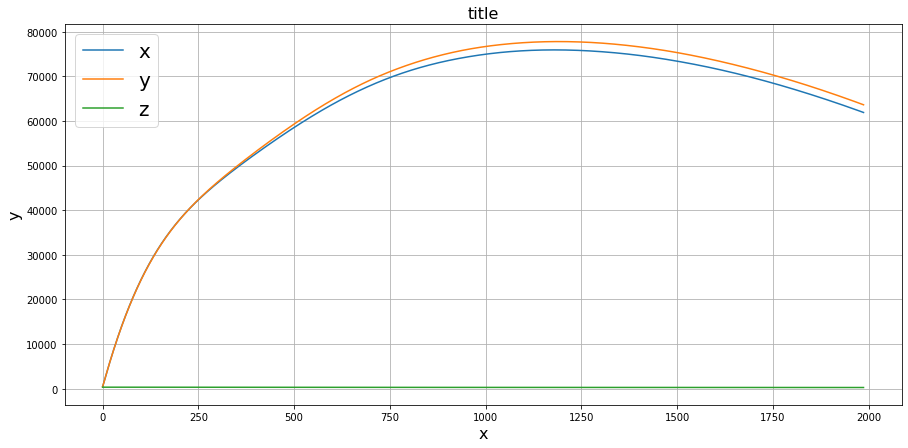

In [65]:
showPlease([np.array(giveElementsFromMatrix(kalman_A.listP,0,0))**0.5,np.array(giveElementsFromMatrix(kalman_A.listP,2,2))**0.5,np.array(giveElementsFromMatrix(kalman_A.listP,4,4))**0.5],["x","y","z"])

In [73]:
def min_distance(a,b):
  distances = []
  min = np.inf
  ind = [0,1,2]
  if(len(a[0]) == 5):
    ind = [0,2,4]
  for i in range(0,len(a)):
    v_a = a[i]
    v_b = b[i]
    d = ((v_a.item(0,0)-v_b.item(0,0))**2 + (v_a.item(ind[1],0)-v_b.item(ind[1],0))**2 + (v_a.item(ind[2],0)-v_b.item(ind[2],0))**2)**0.5
    if(d < min):
      min = d
    distances.append(d)
  return min, distances

In [74]:
def meas_Cart(meas_pol):
  meas_cart = []
  for i in meas_pol:
    D = i.item(0,0)
    beta = i.item(1,0)
    eps = i.item(2,0)
    x = D*np.cos(eps)*np.sin(beta)
    y = D*np.cos(eps)*np.cos(beta)
    z = D*np.sin(eps)
    meas_cart.append(vector([x,y,z]))
  return meas_cart

In [75]:
meas_Cart_A = meas_Cart(z_A)
meas_Cart_B = meas_Cart(z_B)

In [76]:
notfiltered_min_d,notfiltered_list_d = min_distance(meas_Cart_A,meas_Cart_B)

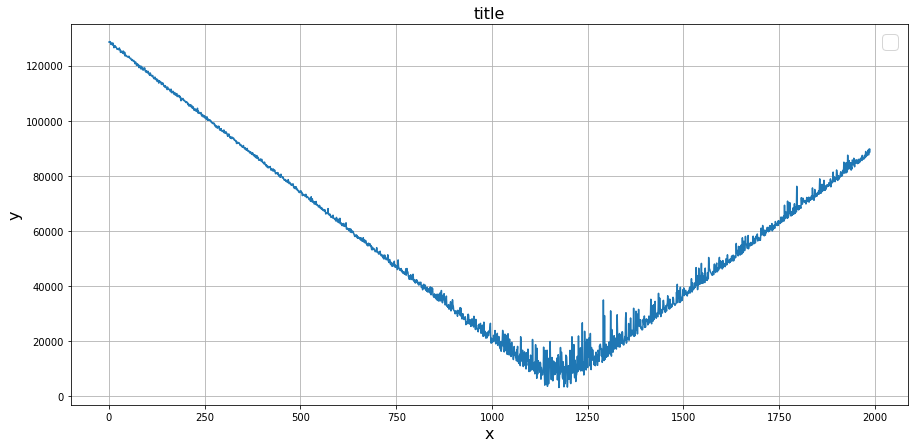

In [77]:
showPlease([notfiltered_list_d])

In [78]:
notfiltered_min_d

3123.9531471103683

In [79]:
filtered_min_d,filtered_list_d = min_distance(kalman_A.kalmanVectors,kalman_B.kalmanVectors)

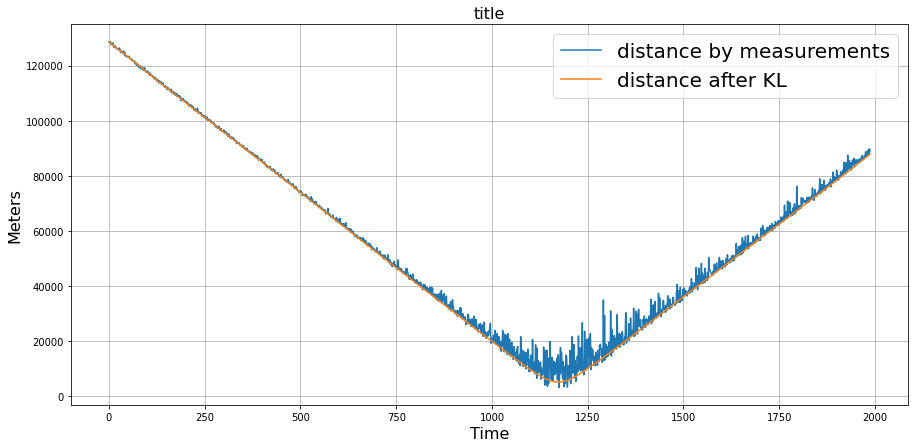

In [102]:
showPlease([notfiltered_list_d,filtered_list_d],["distance by measurements","distance after KL"],"Time","Meters")

In [82]:
filtered_min_d

5124.284911411653